In [1]:
import tensorflow as tf
import keras
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import fashion_mnist
from keras.models import Model

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print('Shape of X train: ',X_train.shape,'Shape of X train:' , y_train.shape)
print('Shape of X test:', X_test.shape,'Shape of X test:', y_test.shape)

Shape of X train:  (60000, 28, 28) Shape of X train: (60000,)
Shape of X test: (10000, 28, 28) Shape of X test: (10000,)


In [4]:
X_train = X_train/255
X_test = X_test/255

channel = 1
img_h , img_w = X_train.shape[1:]

X_train = X_train.reshape(X_train.shape[0], img_h, img_w, channel)
X_test = X_test.reshape(X_test.shape[0], img_h, img_w, channel)

input_shape = (img_h, img_w, channel)

In [5]:
no_of_classes = 10
y_train_oh = np.eye(no_of_classes)[y_train]
y_test_oh = np.eye(no_of_classes)[y_test]

In [6]:
index_to_class = {0: 'T-shirt',
                  1: 'Trouser',
                  2: 'Pullover',
                  3: 'Dress',
                  4: 'Coat',
                  5: 'Sandle',
                  6: 'Sirt',
                  7: 'Sneaker',
                  8: 'Bag',
                  9: 'Ankle Boot'}

In [7]:
input_layer = Input(input_shape)

x = Conv2D(filters=4, kernel_size=5, activation='relu')(input_layer)
x = Conv2D(filters=8, kernel_size=5, strides=(2, 2), activation='relu')(x)
x = Conv2D(filters=16, kernel_size=5, strides=(2, 2), activation='relu')(x)
x = Flatten()(x)
x = Dense(units= 64, activation='relu')(x)
x = Dense(units=10, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=x)

In [8]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 4)         104       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 8)         808       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 16)          3216      
_________________________________________________________________
flatten (Flatten)            (None, 144)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                9280      
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_oh, epochs=20, batch_size=32, validation_data=(X_test, y_test_oh))

Epoch 1/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.6374 - accuracy: 0.7653 - val_loss: 0.5166 - val_accuracy: 0.8084
Epoch 2/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4468 - accuracy: 0.8375 - val_loss: 0.4584 - val_accuracy: 0.8309
Epoch 3/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3936 - accuracy: 0.8556 - val_loss: 0.4209 - val_accuracy: 0.8503
Epoch 4/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3631 - accuracy: 0.8655 - val_loss: 0.3844 - val_accuracy: 0.8579
Epoch 5/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3403 - accuracy: 0.8729 - val_loss: 0.3722 - val_accuracy: 0.8649
Epoch 6/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3235 - accuracy: 0.8798 - val_loss: 0.3739 - val_accuracy: 0.8647
Epoch 7/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3101 - accuracy: 0.8848 - val_loss: 0.3722 -

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

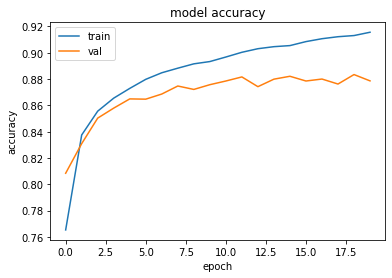

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

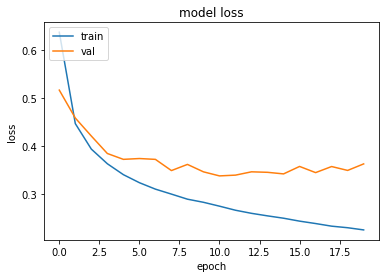

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()